# 4.18.45 Machine Learning Foundations 3

Businesses are often faced with a problem that requires the **automation of a decision**: 
- is a transaction fraudulent? 
- is a customer going to churn? 
- is a user likely to click on a search ad? 

These are all **classification problems**, where the goal is to **predict whether a record is a 0 or a 1** (fraud/not-fraud, churn/no-churn, click/no-click) or, in some cases, to **predict one of several categories** (for instance, guessing the correct species of a new iris flower by looking at its petal and sepal measurements). 

### Logistic Regression

In the last class, we saw how the relationship between a numeric target variable and some numeric predictors can be modelled using the method of least squares to estimate the parameters of a regression line. 

As we just anticipated, sometimes, instead of numeric, you'll want to **predict a binary target** variable (ie: a o or a 1), in those cases **Logistic Regression** is the right tool for the task. It is analogous to multiple linear regression, except for the fact (as we just said) that the outcome is binary.

So, if the **target variable is binary**, how can we **create a linear model** that, given some independent variables, can predict the correct outcome? 

> Let's pretend we don't know about Logistic Regression, could we fit a linear regression model? Let's try this with a simple, synthetic dataset.

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(9, 5)})

from sklearn.linear_model import LinearRegression

In [3]:
# create dataset
x = np.array([220, 209, 224, 213, 223, 215 , 221, 212, 218, 214])
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
# show data 
np.column_stack((x, y))

array([[220,   1],
       [209,   0],
       [224,   1],
       [213,   0],
       [223,   1],
       [215,   0],
       [221,   1],
       [212,   0],
       [218,   1],
       [214,   0]])

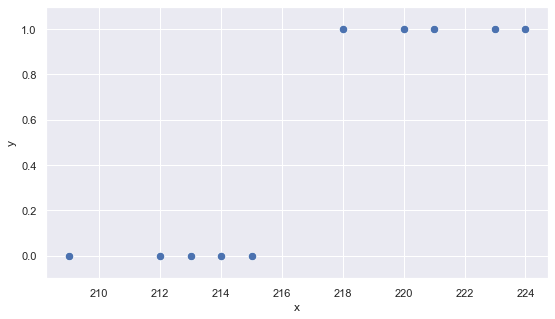

In [4]:
# scatterplot of data
gr = sns.scatterplot(x=x, y=y, s=70)
gr.set_ylabel('y')
gr.set_xlabel('x')

# fit linear regression model
lin_reg = LinearRegression().fit(x.reshape(-1,1), y)
lin_reg.intercept_, lin_reg.coef_[0]

# plot regression line
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = lin_reg.intercept_+lin_reg.coef_[0]*x_vals
#plt.plot(x_vals, y_vals, 'r--')

# draw threshold at y = 0.5 
#plt.axhline(0.5, color='xkcd:grey', linestyle='-')
#plt.axvline((0.5 - lin_reg.intercept_)/lin_reg.coef_[0], color='xkcd:grey', linestyle='-')
#axes.add_patch(matplotlib.patches.Rectangle(((0.5 - lin_reg.intercept_)/lin_reg.coef_[0], 0.5), 100, 10, color ='teal', alpha=0.2))
#axes.add_patch(matplotlib.patches.Rectangle(((0.5 - lin_reg.intercept_)/lin_reg.coef_[0], 0.5), -100, -10, color ='orange', alpha=0.2))

axes.set_ylim([-0.1, 1.1])
plt.show()

Technically, it's possible to fit a regression model to a binary target variable however, in most real case scenarios, it is not recommended, since the accuracy of the model would be affected negatively. Furthermore, a linear regression model may output values much larger than 1 or much smaller than 0, which would be kind of strange since our response variable can only take values of either 1 or 0. 

A better solution would be to use a function that can map any value on the x-axis to a range between 0 and 1; luckily for us, the **logistic Function** does just that. 

#### Logistic Function

The **logistic function**, known also as the **sigmoid** function, is an s-shaped function that has the following mathematical form: 

$$
    f(x) = \frac{1}{1+e^{-x}}
$$

If we plot this function on a Cartesian plane, we obtain the characteristic s-shaped logistic function:

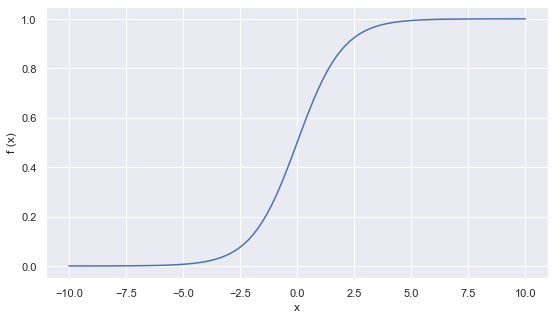

In [5]:
x_vals = np.linspace(-10, 10, 100)
y_vals = 1 / (1 + np.exp(-x_vals))
gr = sns.lineplot(x=x_vals, y=y_vals)
gr.set_ylabel('f (x)')
gr.set_xlabel('x')
plt.show()

So, as you can see from the graph, the Logistic function $f(x)$ has the **following properties**: 
- $f(x) \to 0 \quad$ for $ \quad x \to -\infty$
- $f(x) \to 1 \quad$ for $ \quad x \to +\infty$
- $f(x) > 0.5 \quad$ when $\quad x>0$

It follows that, if we map the values of $x$ with a logistic function, we can **propose a rule** that classifies a record to a 1 or a 0 **according to a threshold**, for instance: 
- $y = 1 \longleftarrow f(x) \geq 0.5 \iff x\geq0$
- $y = 0 \longleftarrow f(x) < 0.5 \iff x<0$

#### Logistic Model

Now, when we defined the regression model in the previous class, we used the following **generalised linear form**: 

$$
    y = b^TX
$$

The idea is to feed our model to the logistic function $f(x)$, so that, instead of the linear model above, we get the following **non-linear logistic model**: 

$$
    y = f(b^TX)
$$

where, since $f(x) = \frac{1}{1+e^{-x}}$, it follows that:

$$
    y =  \frac{1}{1+e^{-b^TX}}
$$


Let's consider a **simple case** where we have two regressors $x_1$ and $x_2$, in this case we'll have: 

$$
    b^TX = b_0 + b_1x_1 + b_2x_2
$$

Therefore, it follows from our **previous threshold rule** that: 

$$
    \begin{align*}
    y = 1 &\longleftarrow f(b^TX) \geq 0.5 \iff b_0 + b_1x_1 + b_2x_2 \geq 0 \\
    y = 0 &\longleftarrow f(b^TX) < 0.5 \iff b_0 + b_1x_1 + b_2x_2 < 0
    \end{align*}
$$

#### Decision Boundary

Given the following synthetic dataset, assume we've estimated the coefficients $b_0=-4.8$, $b_1=1$ and $b_2=1$ such that the following line is drawn to separate the orange dots $(Y=1)$ from the blue $(Y=0)$. Such a line is known as the **decision boundary** of the model and it follows directly from what we just saw in the previous section. In fact, let's say we estimated the set of coefficients $b$, we could then rewrite the above inequalities as follows: 

$$
    \begin{align*}
    y = 1 &\iff -4.8 + x_1 + x_2 \geq 0 \\
    y = 0 &\iff -4.8 + x_1 + x_2 < 0
    \end{align*}
$$

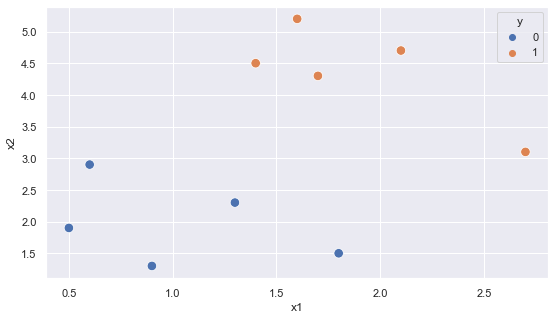

In [6]:
data = pd.DataFrame({'y': [0,0,0,0,0,1,1,1,1,1], 
                     'x1': [.5, .9, 1.3, .6, 1.8, 1.4, 1.7, 1.6, 2.7, 2.1], 
                     'x2': [1.9, 1.3, 2.3, 2.9, 1.5, 4.5, 4.3, 5.2, 3.1, 4.7]})
sns.scatterplot(x='x1', y='x2', hue='y', data=data, s = 90)

axes = plt.gca()
x1_vals = np.array(axes.get_xlim())
x2_vals = 4.8 - x1_vals
#plt.plot(x1_vals, x2_vals, 'r--')

#axes.fill_between(x1_vals, x2_vals, np.max(data.x2)+.5, color = 'orange', alpha=0.2)
#axes.fill_between(x1_vals, x2_vals, color = 'lightblue', alpha=0.35)

plt.show()

We won't go into the technical details of how to estimate the parameters of a logistic regression, but you can [find a detailed explatation here](https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/). 

### Case Study: Income predictions

We will use the `penguins` dataset from the `seaborn` package to predict the `sex` of the penguin based on some other features present in the data. 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
df = sns.load_dataset('penguins')
df = df[~pd.isna(df.flipper_length_mm)]
df['target'] = [1 if el == 'Male' else 0 for el in df['sex']]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,target
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


#### Exploratory Data Analysis

As usual, let's do some preliminary data analysis, in particular let's see how the different metrics are distributed according to the species of the animal as well as the target variable (here transformed to a binary indicator where Male = 1):

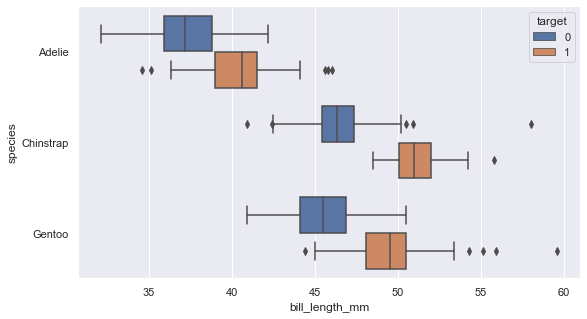

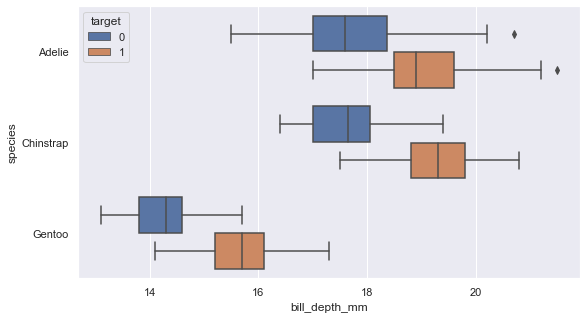

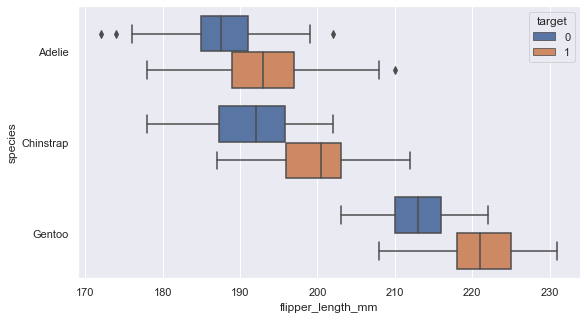

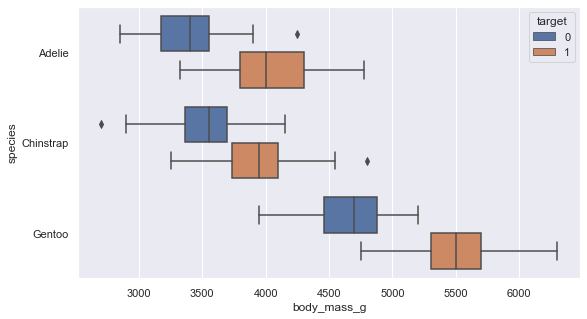

In [9]:
for feature in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']: 
    sns.boxplot(x=feature, y='species', hue='target', data = df)
    plt.show()

#### Dummy Variables

Since `species` is a **categorical variable**, we convert this variable in $k-1$ **[dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))**, where $k$ is the number of categories present in the variable. Why $k-1$ and not $k$? In short, because of multicollinearity... [find out more here](https://www.learndatasci.com/glossary/dummy-variable-trap/). 

In [10]:
df2 = pd.get_dummies(df, columns=["species"])
df2 = df2[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g','target',
           'species_Adelie','species_Chinstrap','species_Gentoo']]
df2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,target,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,1,0,0
2,40.3,18.0,195.0,3250.0,0,1,0,0
4,36.7,19.3,193.0,3450.0,0,1,0,0
5,39.3,20.6,190.0,3650.0,1,1,0,0


#### Your Turn

You will now have the task to define and fit a Logistic regression model to the data. Follow the guidelines below:

1. look at the predictors that are available and decide which you want to include in the model; 
2. remember to check for the possibility of multicollinearity between the regressors (*hint: `.corr()` is your friend*);
3. once you're happy with your data, create a predictors matrix $X$ and a responce vector $y$ 
4. remember to split the data between training and test sets
5. research the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) regarding the Logistic regression page of the `sklearn` library and fit a Logistic regression model to the training data; 
6. Print out the regressioin coefficients; 
7. Use the model you just trained to on the test set (`X_test`) to produce a vector of predictions `y_pred`; 
8. compute the model accuracy as "average number of correct predictions" (that is, how many times `y_pred` is `==` to `y_test` divided by total observations in test).

#### Multicollinearity

**Multicollinearity** among the predictors is still an issue in Logistic regression, therefore we do a preliminary check on the variables, especially on the numeric ones and find that `flipper_length_mm` and `body_mass_g` are **highly correlated**, so it would be best to choose either one or the other. We stick with `body_mass_g` since it appears to be less correlated with the other features. 

In [11]:
df2[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


#### Model Definition

Starting from the predictors matrix $X$ and the target vector $y$, we split the dataset in **70% for training** and 30% for testing, then we proceed to **define the model** and **fit it to the data**, thus obtaining the **estimates of the regression coefficients**. 

In [12]:
y = df2['target']
X = df2[['body_mass_g','bill_length_mm','bill_depth_mm','species_Adelie','species_Chinstrap']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
print('Intercept:', log_reg.intercept_)
print('Coefficients:', log_reg.coef_[0])

Intercept: [-63.9544871]
Coefficients: [ 0.00488068  0.25555693  1.83808017  1.87281418 -0.82887732]


#### Model Evaluation

We use the model we just trained to calculate the $\hat{y}$ prediction estimates. We will then use these predictions to assess the performance of the model using a **[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)**, that is a specific table that provides a **visualization of the performance** of a classification model. 

In [16]:
y_pred = log_reg.predict(X_test)

In [17]:
# accuracy of predictions:
np.mean(y_pred==y_test)

0.912621359223301

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[48,  3],
       [ 6, 46]])

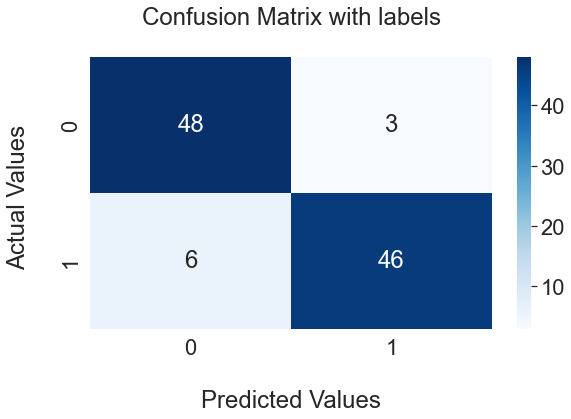

In [20]:
# visualization of the Confusion Matrix
sns.set(font_scale=2)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values \n');

ax.yaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()

A confusion matrix summarises the prediction results of a classification model. The number of correct and incorrect predictions are summarized by counting their values and broking them down by the actual and predicted classes. 

> Although it may confuse its reader, its name comes from the fact that it shows the ways in which your classification model is confused when it makes predictions. 

Not only it tells you the errors your classifier is making, but it also breaks down the types of errors that are being made.

<img src="img/confusion-matrix.png" width="700">

Thanks to the confusion matrix, we can calculate more **advanced classification metrics** such as: 
- **accuracy**: percent of correct prediction overall.
- **precision**: correct positive predictions relative to total positive predictions; this is a good measure to evaluate in cases where the **costs of False Positive is high** (like email spam detection).
- **recall**: correct positive predictions relative to total actual positives; this is a good measure to evaluate in cases where the **costs of False Negative is high** (like fraud detection).
- there are more, check them out [here](https://www.ml-concepts.com/2022/01/15/accuracy-specificity-precision-recall-and-f1-score-for-model-selection/)

<img src="img/cm-metrics.png" width="700">

Be sure to check out **[this page](https://mlu-explain.github.io/precision-recall/)** from Jared Wilber's great website for a visual interpretation of Accuracy, Precision and Recall (and the **F1 score** as well) as well as **[this page](https://mlu-explain.github.io/roc-auc/)** to find out what is a **Receiver Operating Characteristic** (ROC) curve and why we care about the **area underneath it** (AUC).

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.912621359223301

In [22]:
metrics.precision_score(y_test, y_pred)

0.9387755102040817

In [23]:
metrics.recall_score(y_test, y_pred)

0.8846153846153846

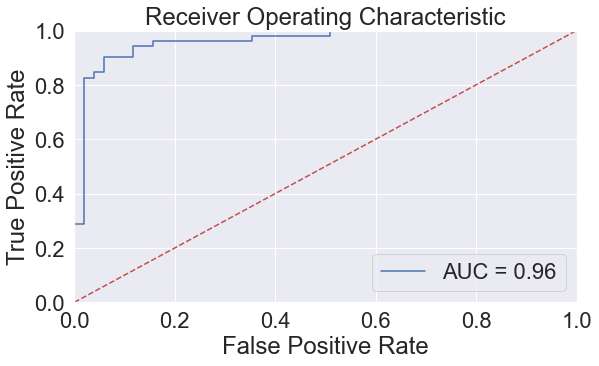

In [24]:
# calculate the fpr and tpr for all thresholds of the classification
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve and print the AUC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Further Reading

- The Elements of Statistical Learning - by Friedman, Tibshirani, Hastie
    - [Free PDF](https://hastie.su.domains/Papers/ESLII.pdf)
    - [Hardcover](https://www.amazon.com/Elements-Statistical-Learning-Prediction-Statistics/dp/0387848576)